# Use of Earnings Call Transcripts in Predicting Stock Market Movements: Sentiment Analysis and Topic Modeling

In [1]:
from requests import get
from bs4 import BeautifulSoup
from scrape import write_textfile
from pandas import read_csv

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
"""
from requests import get 
from bs4 import BeautifulSoup

def write_textfile(url=None, foldername=None,  filename=None):
    page = get(url)
    soup = BeautifulSoup(page.content.decode("utf-8"), "html.parser")
    p_tag = [ p.text for p in soup.find_all("p") ]
    with open(f"{foldername}/_{filename}.txt", mode="w", encoding="utf-8") as new_text_file:

        for each_p_tag in p_tag:
            new_text_file.write(each_p_tag+" ")
"""

In [ ]:
"""
main_tble = read_csv("main_tbl.csv")
sample_tickers = read_csv("sample_tickers.csv").loc[:, "sample_tickers"].to_list()

analyze_table = main_tble[main_tble["tick"].isin(sample_tickers)]

#for i, row in analyze_table.iterrows():
#    url = row['url']
    
#    write_textfile(url=url, foldername="Scripts", filename= i)

"""

In [ ]:
"""
from os import listdir, getcwd
from pandas import DataFrame

base = "/Users/bb/Desktop/Demo2/Scripts/"
ref = []

for file in listdir(base):
    filename = ''.join((base, file))
    with open(filename, mode="r+", encoding="utf-8") as text_file:
        my_text_file = text_file.readlines()
        #print(my_text_file[0])
        #print('+++++++++++++++++++++++++++++++++++')
        try:
            ind = my_text_file[0].index("Question-and-Answer Session")
            #print(ind)
            ceo_present = my_text_file[0][:ind]
            #print(ind, ceo_present)
            #print("+++++++++++++++++++")
            q_and_a = my_text_file[0][ind :]
            #print(ind, q_and_a)
            #print("----------------------")
            ref.append({
                "filename": file,
                "ceo_present": ceo_present,
                "qanda": q_and_a})
        except ValueError:
            print(filename)
        
df = DataFrame(ref)
df.head()
"""

In [1]:

from re import findall
from nltk.tokenize import sent_tokenize, word_tokenize

def earning_call_ticker(text):
    '''
    returns ticker of the earnings call transcript. 
    It must be in the bracket
    '''
    ret_value = ""
    first_sentence = text[:150]
    
    inside = first_sentence[first_sentence.find("(")+1 : first_sentence.find(")")]
    inside1 = inside.split(":")
    if len(inside1) == 1:
        ret_value = inside1[0]
    else:
        ret_value=inside1[1]
    ret_value = ret_value.replace("'", "")
    return ret_value



In [ ]:
"""
df["ticker"] = df.loc[:, "ceo_present"].apply(lambda x: earning_call_ticker(x))
df.head()
"""

In [2]:
def earning_call_date(text):
    '''
    returns ticker of the earnings call transcript. 
    It must be in the bracket
    '''
    years = [str(f) for f in range(2000, 2024)]
    return text[:150]
    #ind = text.index("ET")
    #first_sentence = text[: ind+2].split()
    #return first_sentence

"""
for i, row in df.head().iterrows():
    ceo = row["ceo_present"]
    print(i, earning_call_date(ceo))
"""

'\nfor i, row in df.head().iterrows():\n    ceo = row["ceo_present"]\n    print(i, earning_call_date(ceo))\n'

In [3]:
from nltk.tokenize import word_tokenize
from dateutil import parser
from datetime import datetime
from calendar import month_name


def make_datetime_object(text):
    
    first_onefifty_char = text[:150]
    first_onefifty_lower = word_tokenize(first_onefifty_char.lower().replace(",", ""))
    #return first_onefifty_lower
    
    needed = ''
    
    try:
        ind = first_onefifty_lower.index("call")
        needed = first_onefifty_lower[ind+1:]
        #return ind, needed
        
    except ValueError:
        try:
            #return 'ppppp', first_onefifty_lower
            ind = first_onefifty_lower.index("presentation")
            needed = first_onefifty_lower[ind+1: ]
            #return "ppp", ind, first_onefifty_lower[ind+1: ]
            
        except ValueError:
            #return 'verror', first_onefifty_lower
            ind = first_onefifty_lower.index("conference")
            needed = first_onefifty_lower[ind+1: ]
            #return 'cccc', ind, needed
            
    #return first_onefifty_lower[my_ind+1: ]
    dates_ = needed[:5]
    if len(dates_) == 5:
        pass
    else:
        dates_ = dates_.append('pm')
        #print(dates_)
    #return dates_   

    month, day, year, time, pm = dates_
    month = month.capitalize()
    #day =  day.replace(",", "") 
    date_ = f"{month} {day}, {year}"
   
    return parser.parse(date_)



In [ ]:
"""
df["date"] = df.loc[:, "ceo_present"].apply(lambda x: make_datetime_object(x))
df_sorted = df.sort_values(by='date')
df_sorted.head()
"""

In [ ]:
from yfinance import download
from matplotlib import pyplot as plt 
"""
slab = df_sorted[df_sorted["ticker"] == "SLAB"]
slab_yfin = download(tickers="SLAB", start="2018-01-29", end="2022-10-30", interval='1d')
slab_yfin.reset_index(inplace=True)

dates = slab['date'].to_list()
dates

slab_yfin.plot.line(x='Date', y='Adj Close', figsize=(12, 5))
for each_day in dates:
    plt.axvline(each_day, linewidth=.5, color='r', linestyle = '--')

#slab
"""

In [ ]:
"""
mtsi = df_sorted[df_sorted["ticker"] == "MTSI"]
mtsi_yfin = download(tickers="MTSI", start="2018-01-29", end="2022-11-15", interval='1d')
mtsi_yfin.reset_index(inplace=True)

mtsi_dates = mtsi['date'].to_list()
mtsi_dates

mtsi_yfin.plot.line(x='Date', y='Adj Close', figsize=(12, 5))
for each_day in mtsi_dates:
    plt.axvline(each_day, linewidth=.5, color='r', linestyle = '--')

"""
#mtsi

In [13]:
from yfinance import download
from datetime import timedelta
from matplotlib import pyplot as plt

# nh = df_sorted[df_sorted["ticker"] == "NH"]


def ticker_comparison_graph(my_ticker, my_start_date, my_end_date):
    ticker_main = df_sorted[df_sorted["ticker"] == my_ticker]
    yfin_osis = download(tickers=my_ticker, start=my_start_date, end=my_end_date, interval="1d")
    yfin_osis.reset_index(inplace=True)

    dates__ = ticker_main['date'].to_list()

    #for each_day in dates:
    yfin_osis.plot.line(x='Date', y='Close', figsize=(12, 5))
    for each_date in dates__:
        plt.axvline(each_date, linewidth=.5, color='r', linestyle = '--')

# ticker_comparison_graph("NH", "2018-04-15", "2022-11-15")

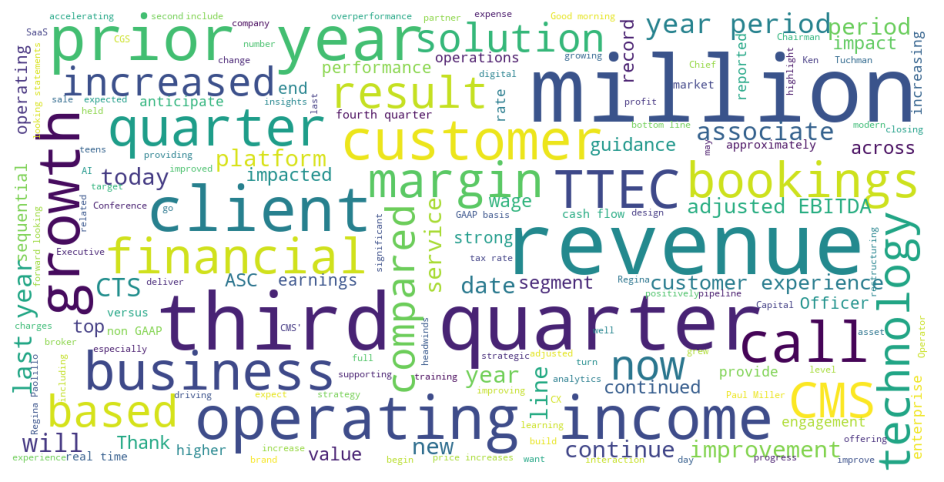

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk import corpus
from wordcloud import WordCloud, STOPWORDS
from pandas import read_pickle
from matplotlib import pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white', 
        stopwords=STOPWORDS, 
        max_words=200, 
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data))
    
    fig = plt.figure(1, figsize=(12, 6))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
df_sorted = read_pickle("main_table.pickle")
#print(f"The company ticker is: {df_sorted.iloc[1, 3]}, and column name is: {df_sorted.columns[1]}")
show_wordcloud(df_sorted[df_sorted["ticker"] =="TTEC"].iloc[1, 1])


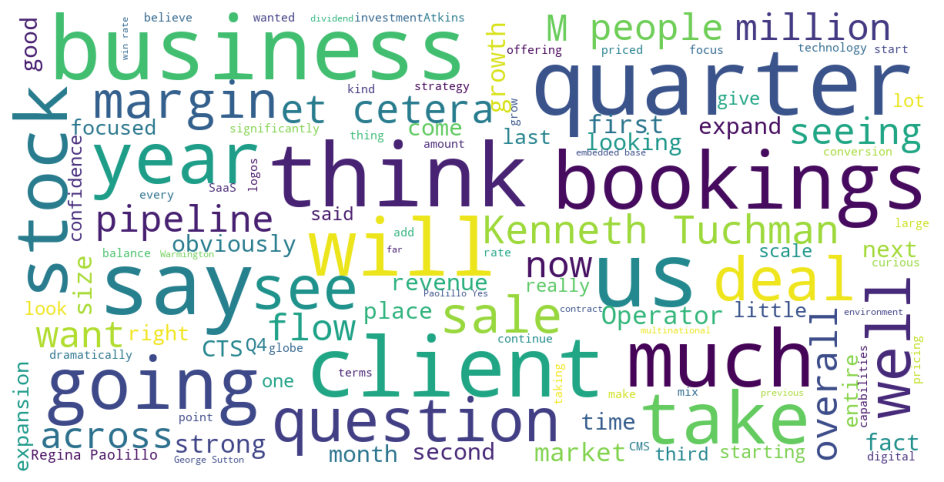

In [7]:
show_wordcloud(df_sorted[df_sorted["ticker"] =="TTEC"].iloc[1, 2])

In [ ]:
from datetime import timedelta
from pandas import set_option
from numpy import nan
"""
set_option("display.max_columns", None)

def pivot_analysis(ticker_name=None, ticker_date=None):
    
    buy_or_sell = ""
    three_days_before = ticker_date - timedelta(days=5)
    three_days_after = ticker_date + timedelta(days=6)
    
    ticker_data_from_yfin = download(tickers=ticker_name, start=three_days_before, end=three_days_after, interval="1d", rounding="True")
    
    if len(ticker_data_from_yfin) >= 8:
        ticker_data_from_yfin = ticker_data_from_yfin.drop(ticker_data_from_yfin.tail(1).index, inplace=True)
    
    #print("data given:", ticker_name, ticker_date)
    try:
        ticker_data_from_yfin['Pivot'] = (ticker_data_from_yfin["High"] + ticker_data_from_yfin["Low"] + ticker_data_from_yfin["Close"]) /3
        ticker_data_from_yfin["R1"] = (2*ticker_data_from_yfin["Pivot"]) - ticker_data_from_yfin["Low"]
        ticker_data_from_yfin["S1"] = (2*ticker_data_from_yfin["Pivot"]) - ticker_data_from_yfin["High"]
        
        ticker_data_from_yfin["R2"] = (ticker_data_from_yfin["Pivot"]) + (ticker_data_from_yfin["High"] - ticker_data_from_yfin["Low"])
        ticker_data_from_yfin["S2"] = (ticker_data_from_yfin["Pivot"]) - (ticker_data_from_yfin["High"] - ticker_data_from_yfin["Low"])
        
        ticker_data_from_yfin["R3"] = (ticker_data_from_yfin["R1"]) + (ticker_data_from_yfin["High"] - ticker_data_from_yfin["Low"])
        ticker_data_from_yfin["S3"] = (ticker_data_from_yfin["S1"]) - (ticker_data_from_yfin["High"] - ticker_data_from_yfin["Low"])
        
        # for better visualization uncomment
        #ticker_data_from_yfin.reset_index(inplace=True)
        # pivot the data into the correct shape
        # df = df.pivot(index='x', columns='color', values='y')
        #pivot_data = ticker_data_from_yfin.loc[:, ["Date", "Close", "Pivot", "R1", "S1"]]#, "R2", "S2", "R3", "S3"]]
        #pivot_data.plot(x="Date")
        
        close_ppoint = ticker_data_from_yfin.loc[ticker_date, ["Close", "Pivot"]] 
        closing, ppoint = close_ppoint
        if closing < ppoint:
            buy_or_sell = "short"
        else:
            buy_or_sell = "buy"
        
    except TypeError:
        #print(f"ticker {ticker_name} for {ticker_date} is empty!")
        buy_or_sell = nan
    return buy_or_sell
    
osis = df_sorted[df_sorted["ticker"] =="OSIS"]

osis.loc[:, "buy_or_sell"] = osis.apply(lambda x: pivot_analysis(ticker_name = x["ticker"], ticker_date = x["date"]), axis=1 )
osis """


In [4]:
from numpy import nan

def pivot_analysis_short(ticker_name=None, ticker_date=None):
    
    buy_or_sell = ""
    three_days_before = ticker_date - timedelta(days=2)
    three_days_after = ticker_date + timedelta(days=2)
    try:
        ticker_data_from_yfin = download(tickers=ticker_name, start=three_days_before, end=three_days_after, interval="1d", rounding="True")
        ticker_data_from_yfin['Pivot'] = (ticker_data_from_yfin["High"] + ticker_data_from_yfin["Low"] + ticker_data_from_yfin["Close"]) /3
        close_ppoint = ticker_data_from_yfin.loc[ticker_date, ["Close", "Pivot"]] 
        closing, ppoint = close_ppoint
        if closing < ppoint:
            buy_or_sell = "short"
        else:
            buy_or_sell = "buy"
            #return ticker_data_from_yfin
    except:
        buy_or_sell = nan
    
    return buy_or_sell


In [18]:
#df_sorted["buy_or_sell"] = df_sorted.apply(lambda x: pivot_analysis_short(ticker_name = x["ticker"], ticker_date = x["date"]), axis=1 )
#df_sorted.head()

In [19]:
#na_dropped = df_sorted.dropna()

In [20]:
#na_dropped.head()

In [21]:
#na_dropped.loc[:, "buy_or_sell"] = na_dropped.loc[:, "buy_or_sell"].astype("category")
#na_dropped.info()

# Dictionary of Sentiment words

In [1]:
import requests
from nltk.tokenize import TreebankWordTokenizer

poswords = "https://cssbook.net/d/positive.txt"
negwords = "https://cssbook.net/d/negative.txt"
pos = set(requests.get(poswords).text.split("\n"))
neg = set(requests.get(negwords).text.split("\n"))
sentimentdict_pos = {word:+1 for word in pos}
sentimentdict_neg = {word:-1 for word in neg}


In [2]:
def sentiment_scores(input_text, pos=True, neg=False):
    my_tokenizer = TreebankWordTokenizer()
    words = my_tokenizer.tokenize(input_text)
    
    if pos == True:
        pos_list = [ word for word in words if word in sentimentdict_pos]
        pos_score = len(pos_list)
        return pos_score, set(pos_list)
    
    elif neg == True:
        neg_list = [ word for word in words if word in sentimentdict_neg]
        neg_score = len(neg_list)
        return neg_score, set(neg_list)

#na_dropped["pos_score"]  = na_dropped.loc[:, "ceo_present"].apply(lambda x: sentiment_scores(input_text=x, pos=True, neg=False)[0])
#na_dropped["pos_words"]  = na_dropped.loc[:, "ceo_present"].apply(lambda x: sentiment_scores(input_text=x, pos=True, neg=False)[1])
#na_dropped["neg_score"]  = na_dropped.loc[:, "ceo_present"].apply(lambda x: sentiment_scores(input_text=x, pos=False, neg=True)[0])
#na_dropped["neg_words"]  = na_dropped.loc[:, "ceo_present"].apply(lambda x: sentiment_scores(input_text=x, pos=False, neg=True)[1])



In [24]:
#na_dropped["qanda_pos_score"]  = na_dropped.loc[:, "qanda"].apply(lambda x: sentiment_scores(input_text=x, pos=True, neg=False)[0])
#na_dropped["qanda_pos_words"]  = na_dropped.loc[:, "qanda"].apply(lambda x: sentiment_scores(input_text=x, pos=True, neg=False)[1])
#na_dropped["qanda_neg_score"]  = na_dropped.loc[:, "qanda"].apply(lambda x: sentiment_scores(input_text=x, pos=False, neg=True)[0])
#na_dropped["qanda_neg_words"]  = na_dropped.loc[:, "qanda"].apply(lambda x: sentiment_scores(input_text=x, pos=False, neg=True)[1])

In [25]:
#na_dropped["sentiment_pos"] = na_dropped["pos_score"] + na_dropped["qanda_pos_score"]
#na_dropped["sentiment_neg"] = na_dropped["neg_score"] + na_dropped["qanda_neg_score"]
#na_dropped.loc[:, ["ticker", "sentiment_pos", "sentiment_neg", "buy_or_sell"]]

In [26]:
#na_dropped.to_pickle("main_table.pickle")

# Main Analysis

In [6]:
from pandas import read_pickle

df = read_pickle("main_table.pickle")
df.columns

Index(['filename', 'ceo_present', 'qanda', 'ticker', 'date', 'buy_or_sell',
       'pos_score', 'pos_words', 'neg_score', 'neg_words', 'qanda_pos_score',
       'qanda_pos_words', 'qanda_neg_score', 'qanda_neg_words',
       'sentiment_pos', 'sentiment_neg'],
      dtype='object')

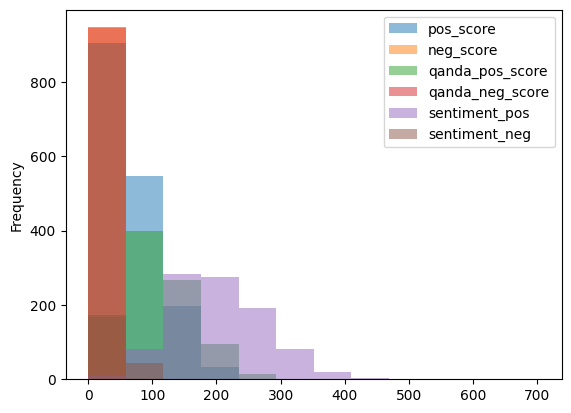

In [7]:
# histogram
ax = df.plot.hist(bins=12, alpha=0.5)

In [29]:
scores = df.loc[:, ['ticker', 'date', 'buy_or_sell',
       'pos_score',  'neg_score', 'qanda_pos_score',
        'qanda_neg_score']]

scores.describe()

,pos_score,neg_score,qanda_pos_score,qanda_neg_score
count,947.000000,947.000000,947.000000,947.000000
mean,95.055966,15.153115,107.644139,15.673706
std,42.902244,9.145800,53.013033,9.624459
min,1.000000,0.000000,0.000000,0.000000
25%,68.000000,9.000000,70.000000,9.000000
50%,90.000000,13.000000,103.000000,14.000000
75%,116.000000,19.000000,143.000000,21.000000
max,563.000000,73.000000,270.000000,57.000000


from pandas import set_option
set_option('max_colwidth', 800)


In [15]:
na_dropped[na_dropped['ticker'] == "MANH"]

,filename,ceo_present,qanda,ticker,date,buy_or_sell
493,_42484.txt,"Manhattan Associates, Inc. (NASDAQ:MANH) Q3 20...",Question-and-Answer Session Operator [Operator...,MANH,2018-10-23,buy
713,_37007.txt,"Manhattan Associates, Inc. (NASDAQ:MANH) Q4 20...",Question-and-Answer Session Operator [Operator...,MANH,2019-02-05,buy
563,_32782.txt,"Manhattan Associates, Inc. (NASDAQ:MANH) Q1 20...",Question-and-Answer Session Operator [Operator...,MANH,2019-04-23,buy
641,_27978.txt,"Manhattan Associates, Inc. (NASDAQ:MANH) Q2 20...",Question-and-Answer Session Operator [Operator...,MANH,2019-07-23,buy
326,_23080.txt,"Manhattan Associates, Inc. (NASDAQ:MANH) Q3 20...",Question-and-Answer Session Operator [Operator...,MANH,2019-10-22,short
577,_17674.txt,"Manhattan Associates, Inc. (NASDAQ:MANH) Q4 20...",Question-and-Answer Session Operator Thank you...,MANH,2020-02-04,short
905,_13728.txt,"Manhattan Associates, Inc. (NASDAQ:MANH) Q1 20...",Question-and-Answer Session Operator Thank you...,MANH,2020-04-21,short
770,_8647.txt,"Manhattan Associates, Inc. (NASDAQ:MANH) Q2 20...",Question-and-Answer Session Operator Excellent...,MANH,2020-07-23,short
23,_3556.txt,"Manhattan Associates, Inc. (NASDAQ:MANH) Q3 20...",Question-and-Answer Session Operator [Operator...,MANH,2020-10-22,buy
478,_77984.txt,"Manhattan Associates, Inc. (NASDAQ:MANH) Q4 20...",Question-and-Answer Session Operator [Operator...,MANH,2021-02-02,short


In [16]:
na_dropped.isnull().sum()

filename       0
ceo_present    0
qanda          0
ticker         0
date           0
buy_or_sell    0
dtype: int64

In [19]:
na_dropped["buy_or_sell"].value_counts()

buy      523
short    424
Name: buy_or_sell, dtype: int64

# Split and Train CEO presentation of the Data

In [23]:
# 
X = na_dropped["ceo_present"]
y = na_dropped["buy_or_sell"]

In [24]:
# split data using train test split from sklearn model selection library

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [25]:
# initiate the vectorizer instance of Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectorizer = CountVectorizer() 

In [26]:
# fit the vectorizer to data (build a vocab, coun the number of words)
X_train_counts = vectorizer.fit_transform(X_train)
X_train_counts

<634x20251 sparse matrix of type '<class 'numpy.int64'>'
	with 542491 stored elements in Compressed Sparse Row format>

In [27]:
X_train.shape

(634,)

In [28]:
X_train_counts.shape

(634, 20251)

In [29]:
tfidf_transformer = TfidfTransformer()
X_train_tfdf = tfidf_transformer.fit_transform(X_train_counts)

In [30]:
X_train_tfdf.shape

(634, 20251)

In [32]:
# initiate the term-frequency inverse document frequency instance
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()

In [34]:
# fit the data
X_train_tfdf_vect = tfidf_vect.fit_transform(X_train)
X_train_tfdf_vect

<634x20251 sparse matrix of type '<class 'numpy.float64'>'
	with 542491 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfdf_vect, y_train)

LinearSVC()

In [36]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([("tfidf", TfidfVectorizer()), ("clf", LinearSVC())])

In [37]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [38]:
predictions = text_clf.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))

[[125  48]
 [ 93  47]]


In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         buy       0.57      0.72      0.64       173
       short       0.49      0.34      0.40       140

    accuracy                           0.55       313
   macro avg       0.53      0.53      0.52       313
weighted avg       0.54      0.55      0.53       313



In [41]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictions)

0.549520766773163

In [42]:

with open("_aapl.txt", mode="r", encoding="utf-8") as filename:
    reader = filename.readlines()
    ind = reader[0].index("Question-and-Answer")
    aapl_ceo_present = reader[0][:ind]
    aapl_qanda = reader[0][ind:]
    

In [43]:
text_clf.predict([aapl_ceo_present])

array(['buy'], dtype=object)

In [44]:
text_clf.predict([aapl_qanda])

array(['buy'], dtype=object)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date'>

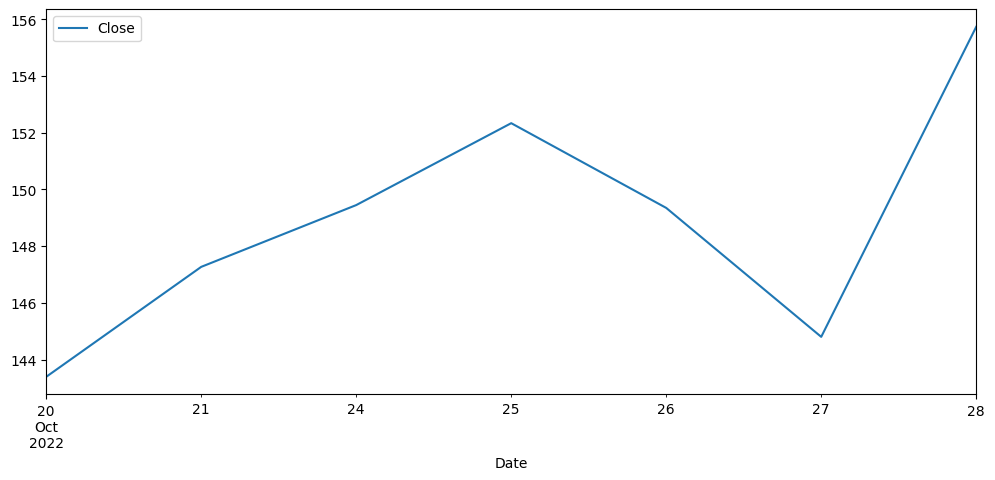

In [45]:
aapl_yfin = download("AAPL", start="2022-10-20", end="2022-10-30", interval="1d")
aapl_yfin.reset_index(inplace=True)
aapl_yfin.plot.line(x="Date", y="Close", figsize=(12,5))

In [8]:
# load and add list of stopwords together --> returns: a list
from pandas import read_csv
import nltk
from nltk.corpus import stopwords
from stop_words import get_stop_words
from sklearn.feature_extraction import text

from_stop_words = get_stop_words("english")
from_nltk = [ words for words in stopwords.words("english")]
from_sklearn = text.ENGLISH_STOP_WORDS.union("book")
miniih = read_csv("stops.csv")["V1"].to_list()


new_stops = ["earnings", "company", "day", "time", "today", "like", "just", "add", "thank", "et", "pm", 
             "nasdaq", "questions", "conference", "participants", "let", "systems", "osi", "quarter", "million", 
             "year", "new", "customers", "results", "non", "second", "total", "operator", "say", "think"]

from_stop_words.extend(from_nltk)
from_stop_words.extend(from_sklearn)
from_stop_words.extend(new_stops)
from_stop_words.extend(miniih)
#print([word for word in from_stop_words][:100])


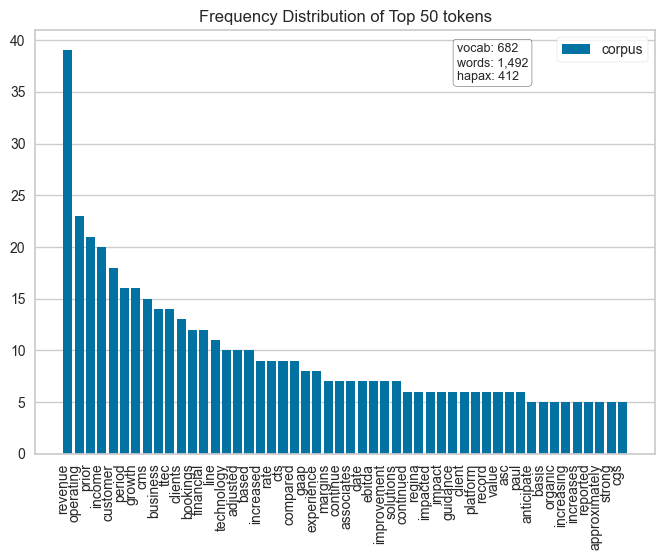

<AxesSubplot: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [9]:
# graph word frequency transcript dated Nov 08, 2018: ceo presentation vs. q and a
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from yellowbrick.text import FreqDistVisualizer

ttec_vectorizer = CountVectorizer(stop_words=from_stop_words)
ceo_explode = df_sorted[df_sorted["ticker"] =="TTEC"].iloc[1, 1].split("\n")
#ceo_explode
#na_dropped["ceo_present"].str.split("\n").explode()

ttec_fit = ttec_vectorizer.fit_transform(ceo_explode)
ttec_features = ttec_vectorizer.get_feature_names_out()
ttec_count_list = ttec_fit.toarray().sum(axis=0)
visualizer = FreqDistVisualizer(features=ttec_features, orient="v")
visualizer.fit(ttec_fit)
visualizer.show()

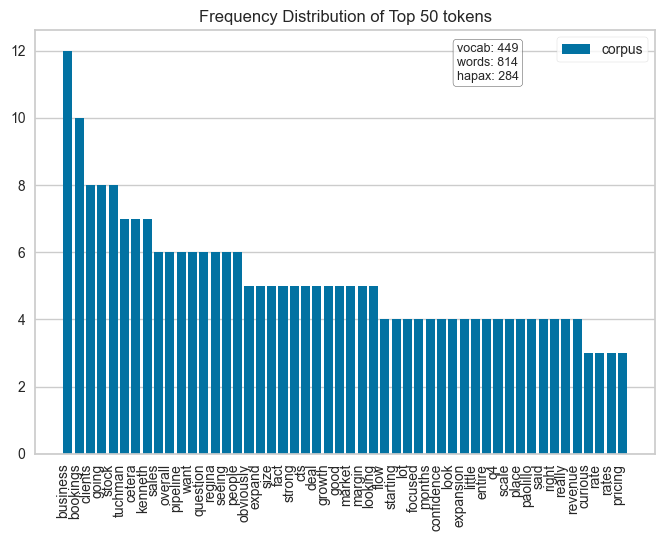

<AxesSubplot: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [10]:
# graph word frequency transcript dated Nov 08, 2018: ceo presentation vs. q and a
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from yellowbrick.text import FreqDistVisualizer

ttec_vectorizer2 = CountVectorizer(stop_words=from_stop_words)
qanda_explode = df_sorted[df_sorted["ticker"] =="TTEC"].iloc[1, 2].split("\n")

ttec_qanda_fit = ttec_vectorizer2.fit_transform(qanda_explode)
ttec_qanda_features = ttec_vectorizer2.get_feature_names_out()

visualizer2 = FreqDistVisualizer(features=ttec_qanda_features, orient="v")
visualizer2.fit(ttec_qanda_fit)
visualizer2.show()

In [11]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 848 to 772
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   filename         947 non-null    object        
 1   ceo_present      947 non-null    object        
 2   qanda            947 non-null    object        
 3   ticker           947 non-null    object        
 4   date             947 non-null    datetime64[ns]
 5   buy_or_sell      947 non-null    category      
 6   pos_score        947 non-null    int64         
 7   pos_words        947 non-null    object        
 8   neg_score        947 non-null    int64         
 9   neg_words        947 non-null    object        
 10  qanda_pos_score  947 non-null    int64         
 11  qanda_pos_words  947 non-null    object        
 12  qanda_neg_score  947 non-null    int64         
 13  qanda_neg_words  947 non-null    object        
 14  sentiment_pos    947 non-null    int64  

In [13]:
vectorizer = CountVectorizer(stop_words=from_stop_words)
ceo_explode = df_sorted["ceo_present"].str.split("\n").explode()

dtm = vectorizer.fit_transform(ceo_explode)
vectorizer

CountVectorizer(stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'all', 'am', 'an', 'and', 'any', 'are', "aren't",
                            'as', 'at', 'be', 'because', 'been', 'before',
                            'being', 'below', 'between', 'both', 'but', 'by',
                            "can't", 'cannot', 'could', "couldn't", 'did', ...])

# Topic Modeling 

In [14]:
import gensim
from gensim import matutils
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [49]:
from pandas import DataFrame
corpus = matutils.Sparse2Corpus(dtm, documents_columns=False) 
vocab = dict(enumerate(vectorizer.get_feature_names_out()))

topic_num = 4
def show_topics(topic_num):
    lda = LdaModel(corpus, id2word=vocab, num_topics=topic_num,
                random_state=123, alpha="asymmetric")
    return DataFrame({f"Topic {n}":[w for (w, tw) in words] for (n, words) in lda.show_topics(formatted=False)})
show_topics(4)

,Topic 0,Topic 1,Topic 2,Topic 3
0,revenue,revenue,revenue,gaap
1,growth,growth,business,revenue
2,business,business,gaap,growth
3,gaap,financial,growth,business
4,fiscal,gaap,continue,financial
5,cash,fiscal,market,continue
6,financial,market,financial,expect
7,market,operating,fiscal,compared
8,customer,continue,cash,net
9,expect,cash,expect,sales


In [50]:
show_topics(6)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,revenue,revenue,revenue,gaap,revenue,revenue
1,growth,business,business,revenue,gaap,financial
2,business,growth,growth,growth,growth,growth
3,fiscal,financial,gaap,business,business,business
4,gaap,gaap,fiscal,financial,cash,market
5,cash,fiscal,continue,sales,strong,cash
6,financial,market,market,net,financial,continue
7,customer,operating,financial,continue,operating,expect
8,market,continue,sales,compared,continue,gaap
9,revenues,share,expect,expect,market,fiscal


In [51]:
show_topics(10)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,revenue,revenue,revenue,gaap,revenue,revenue,revenue,revenue,revenue,revenue
1,growth,business,business,revenue,gaap,growth,growth,business,gaap,business
2,business,growth,gaap,growth,growth,financial,business,growth,business,growth
3,gaap,gaap,growth,business,business,business,cash,financial,fiscal,continue
4,fiscal,financial,market,financial,cash,market,continue,fiscal,growth,expect
5,cash,fiscal,fiscal,net,strong,cash,gaap,gaap,market,market
6,market,market,financial,sales,operating,gaap,financial,continue,financial,gaap
7,financial,operating,continue,compared,financial,expect,expect,share,strong,margin
8,increase,continue,sales,continue,market,continue,customer,market,cash,financial
9,customer,share,product,end,product,fiscal,sales,expect,continue,cash


In [55]:
lda = LdaModel(corpus, id2word=vocab, num_topics=topic_num,
                random_state=123, alpha="asymmetric")
DataFrame({f"Topic {n}":[w for (w, tw) in words] for (n, words) in lda.show_topics(formatted=False)})
lda.show_topics(formatted=False)

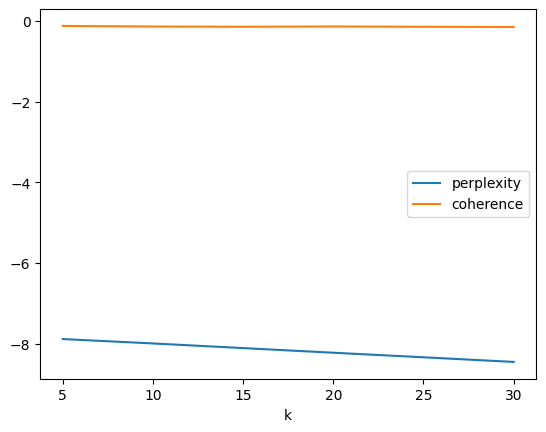

In [56]:
result = []
for k in [5, 10, 15, 20, 25, 30]:
  m = LdaModel(corpus, num_topics=k, id2word=vocab, 
               random_state=123, alpha="asymmetric")
  
  perplexity = m.log_perplexity(corpus)
  coherence=CoherenceModel(model=m, corpus=corpus,
      coherence="u_mass").get_coherence()
  result.append(dict(k=k, perplexity=perplexity, 
                     coherence=coherence))

result = DataFrame(result)
result.plot(x="k", y=["perplexity", "coherence"])
plt.show()